In [53]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [98]:
with np.load("./digits_data.npz") as data :
    X = data["first"]
    y = data["second"]

In [109]:
classes = np.unique(y)
classes

array(['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'three',
       'two', 'zero'], dtype='<U5')

In [54]:
model_1 = tf.keras.models.load_model("./models/model_2.keras")
model_2 = tf.keras.models.load_model("./models/best_model.keras")
model_3 = tf.keras.models.load_model("./models/model_75_.keras")
model_4 = tf.keras.models.load_model("./models/model_e100_acc78_.keras")
model_5 = tf.keras.models.load_model("./models/model_NoneRandom_78_.keras")
model_6 = tf.keras.models.load_model("./models/model_e20_acc77.keras")


In [ ]:
model = tf.keras.models.load_model("./models_last/last_model_e20_acc78_.keras")


In [58]:
with np.load("./models_last/data.npz") as data :
    X_test = data["X_test"]
    y_test = data["y_test"]
    X_train = data["X_test"]
    y_train = data["y_train"]

In [79]:
loss , acc = model.evaluate(X_test, y_test ) 

107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7839 - loss: 1.0338


In [68]:
import pickle

with open("./models_last/last_history_e20_acc78_.pkl", "rb") as his:
    history = pickle.load(his)


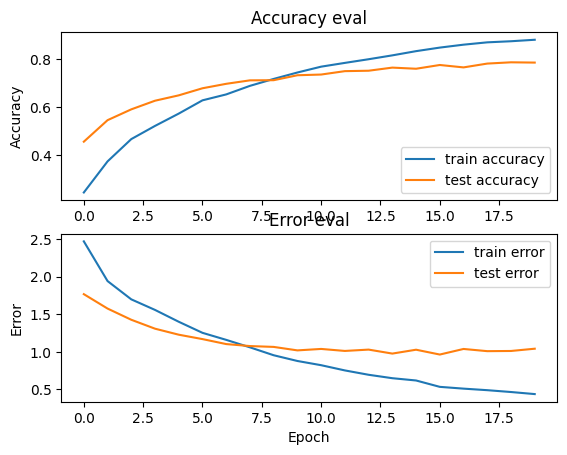

In [76]:
import matplotlib.pyplot as plt
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history["accuracy"], label="train accuracy")
    axs[0].plot(history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history["loss"], label="train error")
    axs[1].plot(history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



plot_history(history)

In [125]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred , axis = 1 )

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


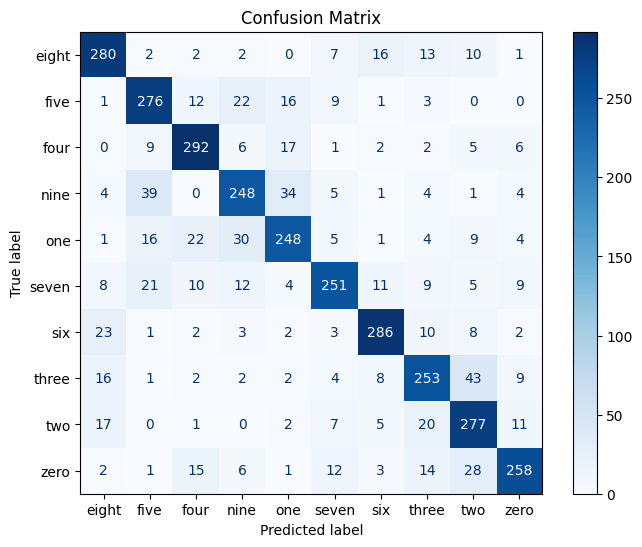

In [156]:
cm = confusion_matrix ( y_test , y_pred , labels = range ( 10 )) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = classes )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap = "Blues" , ax = ax )
plt.title("Confusion Matrix")
plt.show()

In [159]:
report = classification_report ( y_test , y_pred ) 
print ( report ) 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       333
           1       0.75      0.81      0.78       340
           2       0.82      0.86      0.84       340
           3       0.75      0.73      0.74       340
           4       0.76      0.73      0.74       340
           5       0.83      0.74      0.78       340
           6       0.86      0.84      0.85       340
           7       0.76      0.74      0.75       340
           8       0.72      0.81      0.76       340
           9       0.85      0.76      0.80       340

    accuracy                           0.79      3393
   macro avg       0.79      0.79      0.79      3393
weighted avg       0.79      0.79      0.79      3393



In [169]:
from sklearn.preprocessing import label_binarize 
y_binary = label_binarize ( y_test , classes = range ( 10 ) )

In [194]:
y_pred = model.predict(X_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


In [195]:
from sklearn.metrics import roc_curve , auc 
classes_ = range(10)

tpr = dict()
fpr = dict()


roc_auc  = dict()
for i in range ( 10 ):
    fpr[i] , tpr[i] , _ = roc_curve ( y_binary[: , i] , y_pred[: , i ] , drop_intermediate = False ) 
    roc_auc[i] = auc(fpr[i] , tpr[i]) 

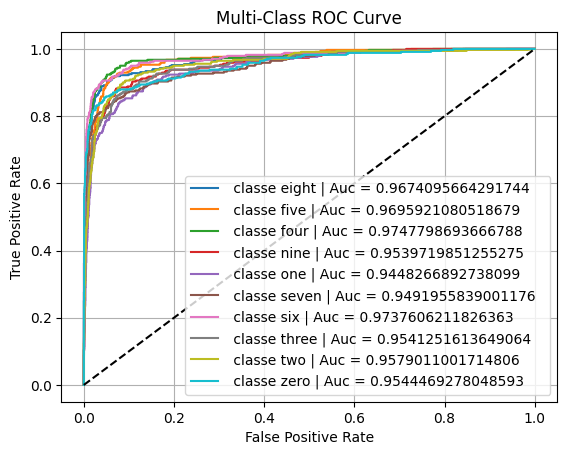

<Figure size 1000x800 with 0 Axes>

In [204]:
plt.figure()
for i in range (10) :
    label  = f" classe {classes[i]} | Auc = {roc_auc[i]}  "
    plt.plot(fpr[i] , tpr[i] , label = label , )
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.figure(figsize = (10 , 8 ) )

plt.show()

In [201]:
model.evaluate(X_test , y_test ) 

107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7839 - loss: 1.0338


[1.0424116849899292, 0.7866194844245911]

In [202]:
model = model_1